# Problem Description
We think we could clustering the Named entity existed in the sentences. however the accuracy still needed to be measure so people can use them with causous. to do that following step is needed
1. find aprropriate number of clustering
2. perform clustering to do experiment and understand the model behaviour
## option for clustering
-  try zero shot clustering 
- may be test with query generation 

In [ ]:
from sentence_transformers import SentenceTransformer
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

def get_best_n():
    pass

def cluster_and_visualize_embeddings(embeddings, texts, n_clusters=4, random_state=42):
    """
    Clusters high-dimensional embedding vectors and visualizes them in a 2D plot.

    Args:
        embeddings (np.ndarray): A 2D numpy array of shape (n_samples, n_features)
                                 containing the embedding vectors.
        n_clusters (int): The number of clusters to form.
        random_state (int): Seed for reproducibility.
    """
    if not isinstance(embeddings, np.ndarray) or embeddings.ndim != 2:
        raise ValueError("Embeddings must be a 2D numpy array.")

    # --- 1. Dimensionality Reduction using PCA ---
    # Reduce the high-dimensional embeddings to 2 dimensions for visualization.
    pca = PCA(n_components=2, random_state=random_state)
    reduced_embeddings = pca.fit_transform(embeddings)
    print(f"Original dimensions: {embeddings.shape[1]}, Reduced dimensions: {reduced_embeddings.shape[1]}")

    # --- 2. Clustering using KMeans ---
    # Apply KMeans clustering on the original high-dimensional embeddings.
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, n_init=10)
    cluster_labels = kmeans.fit_predict(embeddings)

    # --- 3. Visualization ---
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(10, 8))

    # Create a scatter plot of the 2D reduced data, colored by cluster labels.
    scatter = plt.scatter(
        reduced_embeddings[:, 0],
        reduced_embeddings[:, 1],
        c=cluster_labels,
        cmap='viridis',  # A vibrant color map
        alpha=0.8,
        edgecolor='k',
        s=100  # Marker size
    )

    # --- 4. Add Text Annotations (The New Part) ---
    for i, txt in enumerate(texts):
        plt.annotate(
            txt,#[:10]+"...",
            (reduced_embeddings[i, 0], reduced_embeddings[i, 1]),
            textcoords="offset points", # how to position the text
            xytext=(0, 5),             # distance from text to points (x,y)
            ha='center',               # horizontal alignment
            fontsize=8                 # font size
        )

    # Add plot titles and labels
    plt.title('2D Visualization of Clustered Embeddings', fontsize=16)
    plt.xlabel('Principal Component 1', fontsize=12)
    plt.ylabel('Principal Component 2', fontsize=12)
    
    # Add a legend to identify clusters
    plt.legend(handles=scatter.legend_elements()[0],
               labels=[f'Cluster {i}' for i in range(n_clusters)],
               title="Clusters")

    plt.grid(True)
    plt.show()

d:\conda\envs\localcomputer\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import time
# Download from the 🤗 Hub
start = time.time()
model = SentenceTransformer("./models/gemma3")
end = time.time()
print(f"model load time: {end-start} seconds")

model load time: 3.6242659091949463 seconds


In [3]:
# recommended prompt: https://huggingface.co/google/embeddinggemma-300m
prompt_template = "task: clustering | query: {content}"

In [6]:
documents = [
    "Which planet is known as the Red Planet?",
    "Venus is often called Earth's twin because of its similar size and proximity.",
    "Mars, known for its reddish appearance,",# is often referred to as the Red Planet.",
    "Jupiter, the largest planet in our solar system, has a prominent red spot.",
    "Saturn, famous for its rings, is sometimes mistaken for the Red Planet."
]

(5, 768)
Original dimensions: 768, Reduced dimensions: 2


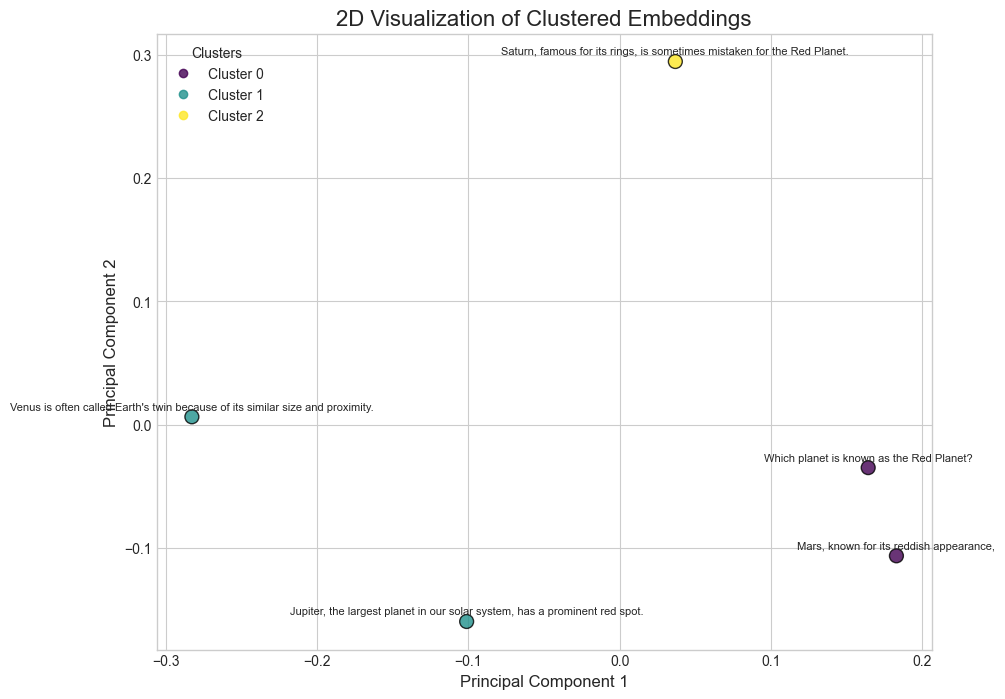

In [7]:
# query_embeddings = model.encode_query(query)
document_embeddings = model.encode_document([prompt_template.format(content=d) for d in documents])
print(document_embeddings.shape)
# (768,) (4, 768)
cluster_and_visualize_embeddings(document_embeddings, documents, n_clusters=3)